In [1]:
import torch
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output

from time import sleep

In [2]:
device = (torch.device('cuda:0') if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [3]:
x = torch.tensor([0, 1, 2], dtype=torch.float64)
x.requires_grad = True

In [4]:
x.to(device)

tensor([0., 1., 2.], device='cuda:0', dtype=torch.float64,
       grad_fn=<ToCopyBackward0>)

In [5]:
loss = x ** 2

In [6]:
loss.requires_grad

True

In [7]:
loss.sum().backward()

In [8]:
loss.requires_grad

True

In [9]:
x.grad

tensor([0., 2., 4.], dtype=torch.float64)

In [10]:
torch.arange(0, 0, 10)

tensor([], dtype=torch.int64)

In [11]:
torch.normal(mean=0, std=5, size=(1, 4))

tensor([[-1.1971,  7.3968,  1.7269, -1.4064]])

In [12]:
def get_normal_noise(mean, std, size):
    noise = torch.normal(mean=mean, std=std, size=(1, size))
    return noise.numpy()[0]

In [13]:
x = np.arange(-100, 100)

In [14]:
y = 6 * x - 35 + get_normal_noise(mean=0, std=80, size=len(x))

In [15]:
len(y)

200

In [16]:
def viz(x, y):
    plt.plot(x, y, 'o')
    plt.show()

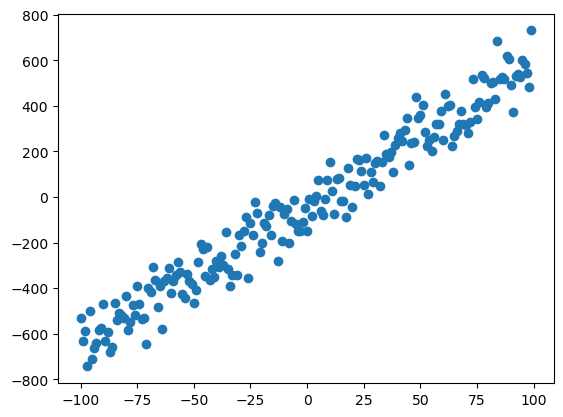

In [17]:
viz(x, y)

In [18]:
w = torch.tensor([1], dtype=torch.float64, requires_grad=True)
b = torch.tensor([1], dtype=torch.float64, requires_grad=True)

last_x = x.copy()
last_y = y.copy()

X = torch.tensor(x, dtype=torch.float64)

Y = torch.tensor(y)

f_w = w * X + b

In [19]:
X = (X - X.mean()) / X.std()

In [20]:
print(X.mean(), X.std())

tensor(2.2204e-18, dtype=torch.float64) tensor(1., dtype=torch.float64)


In [21]:
f_w

tensor([-99., -98., -97., -96., -95., -94., -93., -92., -91., -90., -89., -88.,
        -87., -86., -85., -84., -83., -82., -81., -80., -79., -78., -77., -76.,
        -75., -74., -73., -72., -71., -70., -69., -68., -67., -66., -65., -64.,
        -63., -62., -61., -60., -59., -58., -57., -56., -55., -54., -53., -52.,
        -51., -50., -49., -48., -47., -46., -45., -44., -43., -42., -41., -40.,
        -39., -38., -37., -36., -35., -34., -33., -32., -31., -30., -29., -28.,
        -27., -26., -25., -24., -23., -22., -21., -20., -19., -18., -17., -16.,
        -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,
         -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
          9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
         21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  5

In [22]:
loss = ((f_w - Y) ** 2).sum()

In [23]:
loss.backward()

In [24]:
print(w.grad)
print(b.grad)

tensor([-6853441.2344], dtype=torch.float64)
tensor([16471.1752], dtype=torch.float64)


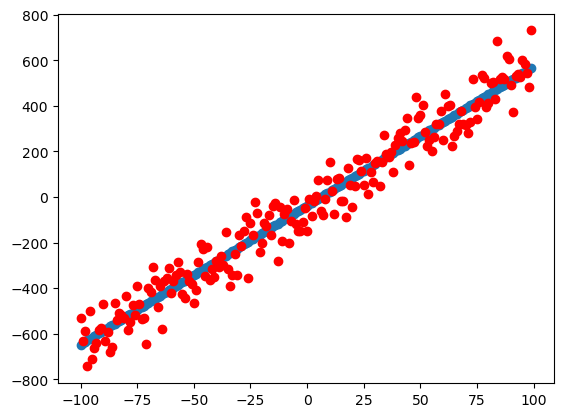

In [25]:
epoch_count = 30
lr = 0.001
history = []
epochs = []

for epoch in range(epoch_count):
    f_w = w * X + b
    loss = ((f_w - Y) ** 2).sum() + w ** 2
    
    history.append(loss.item())
    epochs.append(epoch)
    
    assert w.requires_grad == True
    assert b.requires_grad == True
    
    loss.backward()
    
    w.data -= lr * w.grad.data
    b.data -= lr * b.grad.data

    w.grad.zero_()
    b.grad.zero_()

    clear_output(True)

    plt.plot(x, w.detach() * X + b.detach(), 'o')
    plt.plot(last_x, last_y, 'o', color='red')
    plt.show()
    
    sleep(0.2)

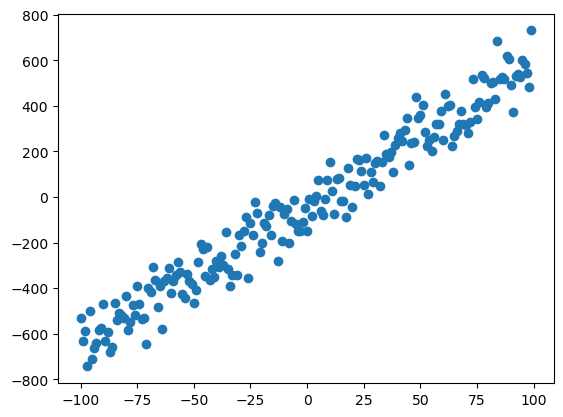

In [26]:
viz(last_x, last_y)